In [1]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds[["isNew", "rooms", "bathrooms", "surface", "price", "date", "level5"]]
ds.head(10)

,isNew,rooms,bathrooms,surface,price,date,level5
0,False,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
1,False,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
2,False,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,Boadilla del Monte
3,False,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
4,False,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
5,False,2.0,1.0,70.0,315000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
6,False,3.0,2.0,145.0,430000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
7,False,2.0,1.0,95.0,275000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
8,False,4.0,3.0,277.0,445000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
9,False,4.0,2.0,129.0,350000,2019-12-28T13:30:00Z,Madrid Capital


In [2]:

ds = ds.convert_dtypes() # convert_dtypes() converts columns to the best possible dtypes using dtypes supporting pd.NA

ds.surface = ds.surface.astype(float)
ds.date = pd.to_datetime(ds.date, format = "ISO8601").dt.strftime("%Y-%m-%d %H:%M:%S")

In [3]:
ds.dtypes

isNew               boolean
rooms                 Int64
bathrooms             Int64
surface             float64
price                 Int64
date                 object
level5       string[python]
dtype: object

In [4]:
 ds = ds.dropna()
ds.reset_index(drop = True, inplace = True) # Vuelve a calcular el indice para que sea 0,1,2,3,4...
ds['id_house'] = ds.index

ds

,isNew,rooms,bathrooms,surface,price,date,level5,id_house
0,False,3,2,103.0,195000,2019-12-28 18:27:15,Arganda del Rey,0
1,False,2,2,99.0,390000,2019-12-28 18:27:15,Boadilla del Monte,1
2,False,3,1,86.0,89000,2019-12-28 18:27:15,Fuenlabrada,2
3,False,2,2,106.0,172000,2019-12-28 18:27:15,Arganda del Rey,3
4,False,2,1,70.0,315000,2019-12-28 18:27:15,Las Rozas de Madrid,4
...,...,...,...,...,...,...,...,...
13631,False,2,1,96.0,259470,2019-12-17 18:19:00,Madrid Capital,13631
13632,False,3,1,150.0,165000,2019-12-17 18:19:00,Velilla de San Antonio,13632
13633,False,4,2,175.0,495000,2019-12-17 18:19:00,Torrelodones,13633
13634,False,3,2,101.0,195000,2019-12-17 18:18:00,Velilla de San Antonio,13634


In [5]:
import sqlalchemy as db

engine = db.create_engine("sqlite:///realstate_solucion.sqlite")
meta = db.MetaData()

con = engine.connect()


In [6]:
from sqlalchemy import Table, Column, Integer, String, Float, Boolean, DateTime

real_state_solucion = Table("realstate", meta,
    Column('id_House', Integer, primary_key = True),
    Column('isNew', Boolean),
    Column('room', Integer),
    Column('bathrooms', Integer),
    Column('surface', Float),
    Column('price', Integer),
    Column('date', String),
    Column('level5', String)
                               
)

meta.create_all(engine)

In [7]:
col_list = ds.columns
col_list

Index(['isNew', 'rooms', 'bathrooms', 'surface', 'price', 'date', 'level5',
       'id_house'],
      dtype='object')

In [8]:
query = db.insert(real_state_solucion)

values_list = [{ col: row[col] for col in col_list} for _, row in ds.iterrows()]  

con.execute(query, values_list)

In [9]:
avg_price = ds.price.mean()


In [10]:
db.select(real_state_solucion).where(real_state_solucion.c.price > avg_price)

In [11]:
query = db.select(real_state_solucion).where(real_state_solucion.c.price > avg_price)

for row in con.execute(query):
    print(row)

(11, False, None, 3, 246.0, 540000, '2019-12-28 18:27:15', 'Villaviciosa de Odón')
(17, False, None, 5, 320.0, 885000, '2019-12-28 18:27:15', ' Madrid Capital')
(18, False, None, 2, 150.0, 550000, '2019-12-28 18:27:15', 'Pozuelo de Alarcón')
(21, False, None, 4, 253.0, 530000, '2019-12-28 07:00:00', 'San Sebastián de los Reyes')
(23, False, None, 4, 300.0, 559000, '2019-12-28 07:00:00', 'Rivas-vaciamadrid')
(26, False, None, 3, 160.0, 790000, '2019-12-28 07:00:00', ' Madrid Capital')
(27, False, None, 2, 125.0, 559000, '2019-12-28 07:00:00', ' Madrid Capital')
(28, False, None, 5, 380.0, 890000, '2019-12-28 18:27:15', ' Madrid Capital')
(29, False, None, 5, 303.0, 1995000, '2019-12-28 18:27:15', ' Madrid Capital')
(30, False, None, 5, 383.0, 1380000, '2019-12-28 18:27:15', ' Madrid Capital')
(34, False, None, 3, 448.0, 495000, '2019-12-28 18:29:09', 'Becerril de la Sierra')
(35, False, None, 8, 900.0, 3500000, '2019-12-28 18:29:09', ' Madrid Capital')
(36, False, None, 3, 340.0, 915000

In [12]:
ds[ds['price'] > avg_price]

,isNew,rooms,bathrooms,surface,price,date,level5,id_house
10,False,4,3,246.0,540000,2019-12-28 18:27:15,Villaviciosa de Odón,10
16,False,5,5,320.0,885000,2019-12-28 18:27:15,Madrid Capital,16
17,False,4,2,150.0,550000,2019-12-28 18:27:15,Pozuelo de Alarcón,17
20,False,4,4,253.0,530000,2019-12-28 07:00:00,San Sebastián de los Reyes,20
22,False,5,4,300.0,559000,2019-12-28 07:00:00,Rivas-vaciamadrid,22
...,...,...,...,...,...,...,...,...
13614,False,2,2,100.0,795000,2019-12-17 18:36:00,Madrid Capital,13614
13615,False,3,2,155.0,689000,2019-12-17 18:33:00,Madrid Capital,13615
13618,False,1,1,78.0,495000,2019-12-17 18:28:00,Madrid Capital,13618
13633,False,4,2,175.0,495000,2019-12-17 18:19:00,Torrelodones,13633


## Contraste de hipótesis

HYPOTHESIS ---> La media de de la superficie de todas las casas no es 97.5

Hipótesis nula: la suposición inicial que se tiene respecto a un parámetro poblacional es falsa.

La media de la superficie de todas las casas es 97.5.

Hipótesis alternativa: Es la hipótesis de la investigación que se pretende probar que es cierta.

La media de la superficie de todas las casas no es 97.5

In [16]:
# Contraste de hipótesis

mean_population = 97.5

sample_surfaces = ds.surface.sample(n = round(len(ds) * 0.2), random_state = 30)
mean_sample = sample_surfaces.mean()
mean_sample

181.73524019068574

In [20]:
from scipy.stats import stats

stats.ttest_1samp(sample_surfaces, mean_population)

# Rechazamos la hipótesis nula 

/tmp/ipykernel_543/1650404414.py:3: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_1samp(sample_surfaces, mean_population)


TtestResult(statistic=21.065373378331845, pvalue=2.161537001210631e-91, df=2726)

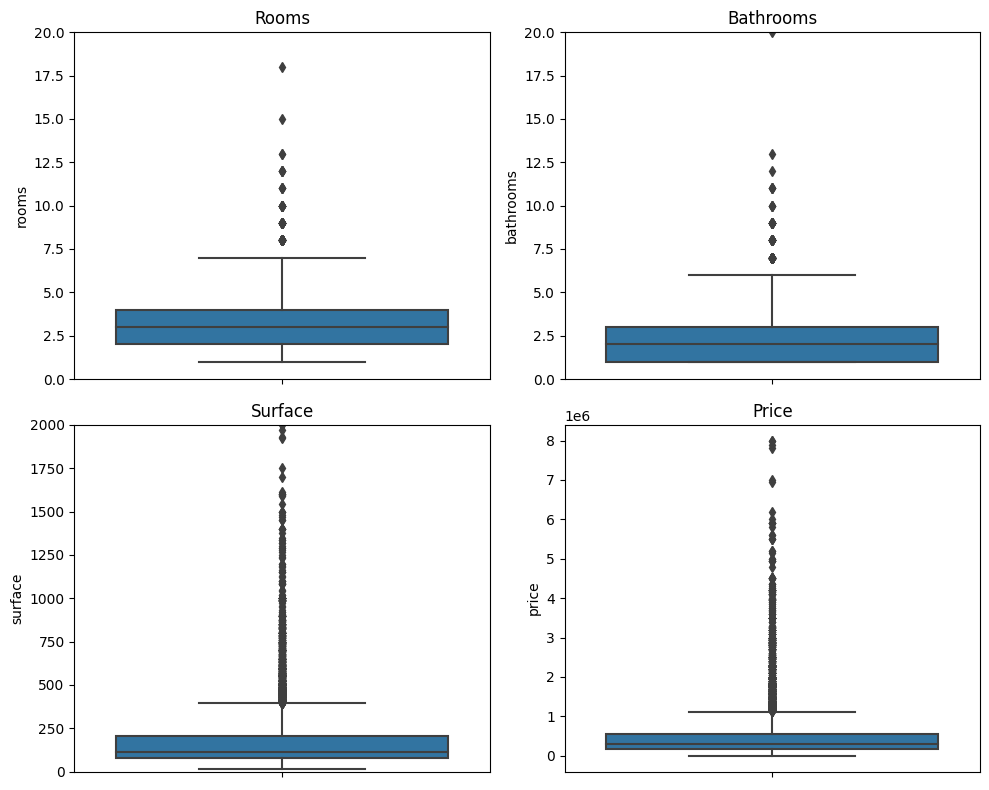

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a boxplot using Seaborn

fig, axes = plt.subplots(2,2, figsize = (10, 8)) 
# Definimos una figura, que tendrá dos filas y dos columnas, y un tamaño concreto (10 de alto x 8 de ancho)
# Tendrá 4 objetos
sns.boxplot(ax=axes[0,0], data = ds, y= 'rooms').set_ylim(0, 20)
sns.boxplot(ax=axes[0,1], data = ds, y= 'bathrooms').set_ylim(0, 20)
sns.boxplot(ax=axes[1,0], data = ds, y= 'surface').set_ylim(0, 2000)
sns.boxplot(ax=axes[1,1], data = ds, y= 'price')

# Set titles for each subplot
ax=axes[0,0].set_title('Rooms')
ax=axes[0,1].set_title('Bathrooms')
ax=axes[1,0].set_title('Surface')
ax=axes[1,1].set_title('Price')

# Adjust the layout
plt.tight_layout()

#Show the plot
plt.show()

 